# Import the needed libraries

In [14]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull

# Import the files to be analyzed

### In my case, I had one .csv file. The column names were the questions, and the values were the answers, given by a likert scale from 1 to 7.


In [2]:
address="C:/Users/chris/Desktop/Estudos/Mestrado/Estudo_Medo/Dados_Experimento_Medo_V1.csv"

dts_medo = pd.read_csv(address)

### As the column names were too big, I needed to change this. So I created a table with new names, renamed the columns

In [3]:
endereco_cabecalho="C:/Users/chris/Desktop/Estudos/Mestrado/Estudo_Medo/Dados_Experimento_Medo_V1_de_para_cabecalho.csv"
dts_medo_cabecalho = pd.read_csv(endereco_cabecalho,header=None)
dts_medo = dts_medo.set_axis(dts_medo_cabecalho.iloc[0], axis=1, inplace=False)


### and in order to analyse clusters, I created a subset with intention (intenção in Portuguese) and Anxiety (ansiedade in Portuguese)

In [4]:
dts_medo_int_ans=pd.concat([
    dts_medo.questionario_tipo,
    (dts_medo.intencao_01+dts_medo.intencao_02+dts_medo.intencao_03+dts_medo.intencao_04+dts_medo.intencao_05)/5,
    (dts_medo.ansiedade_01+dts_medo.ansiedade_02+dts_medo.ansiedade_03+dts_medo.ansiedade_04+dts_medo.ansiedade_05+dts_medo.ansiedade_06)/6,
                           ],
 axis=1,ignore_index=True)

#nomeando as colunas da nova tabela
dts_medo_int_ans.columns=['questionario_tipo','intencao','ansiedade']

# Clustering

In [5]:
# Here we calculated 2 clusters, using kmeans method.

kmeans_2 = KMeans(n_clusters=2).fit(dts_medo_int_ans[['intencao', 'ansiedade']])
centroids_2 = kmeans_2.cluster_centers_

In [6]:
# Here we add the cluster classification to the table, in order to facilitate the plotting
dts_medo_int_ans['kmeans_2'] = kmeans_2.fit_predict(dts_medo_int_ans[['intencao', 'ansiedade']])
print(dts_medo_int_ans)

   questionario_tipo  intencao  ansiedade  kmeans_2
0                  S       7.0   1.333333         1
1                  S       6.4   1.000000         1
2                  S       6.6   1.000000         1
3                  S       7.0   1.000000         1
4                  S       5.2   1.000000         0
5                  S       6.0   1.000000         1
6                  S       7.0   1.000000         1
7                  S       7.0   1.500000         1
8                  S       6.0   1.833333         1
9                  S       6.0   2.000000         1
10                 S       4.0   1.000000         0
11                 S       7.0   1.000000         1
12                 S       4.0   1.000000         0
13                 M       4.2   4.333333         0
14                 M       5.0   1.000000         0
15                 M       5.2   1.000000         0
16                 M       7.0   1.166667         1
17                 M       4.2   2.333333         0
18          

In [8]:
#Here we set a color, according to the cluster

# create a function
def set_color(kmeans_2):
    if kmeans_2 == 0:
        return 'red'
    if kmeans_2 == 1:
        return 'blue'
    else:
        return 'black'
    
# create a new column based on condition
dts_medo_int_ans['color'] = dts_medo_int_ans['kmeans_2'].apply(set_color)
# display the dataframe
#print(dts_medo_int_ans)


   questionario_tipo  intencao  ansiedade  kmeans_2 color
0                  S       7.0   1.333333         1  blue
1                  S       6.4   1.000000         1  blue
2                  S       6.6   1.000000         1  blue
3                  S       7.0   1.000000         1  blue
4                  S       5.2   1.000000         0   red
5                  S       6.0   1.000000         1  blue
6                  S       7.0   1.000000         1  blue
7                  S       7.0   1.500000         1  blue
8                  S       6.0   1.833333         1  blue
9                  S       6.0   2.000000         1  blue
10                 S       4.0   1.000000         0   red
11                 S       7.0   1.000000         1  blue
12                 S       4.0   1.000000         0   red
13                 M       4.2   4.333333         0   red
14                 M       5.0   1.000000         0   red
15                 M       5.2   1.000000         0   red
16            

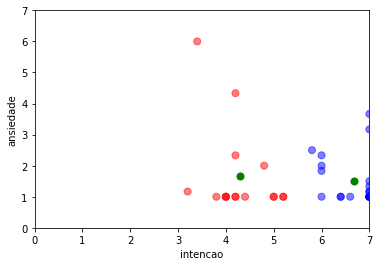

In [10]:
#Here we display the points, marking the clusters by color. Green is used to the center
plt.scatter(dts_medo_int_ans.intencao, dts_medo_int_ans.ansiedade, c= dts_medo_int_ans.color, s=50, alpha=0.5)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='green', s=50)
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("intencao")
plt.ylabel("ansiedade")
plt.show()

Text(0, 0.5, 'ansiedade')

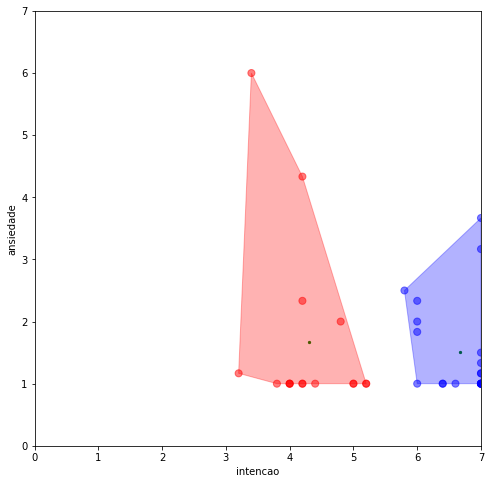

In [18]:
#dts_medo_int_ans['kmeans_2'] = kmeans_2.fit_predict(dts_medo_int_ans[['intencao', 'ansiedade']])
##colors = ['#DF2020', '#81DF20', '#2095DF']
colors = ['red', 'blue', 'black']
#dts_medo_int_ans['c'] = dts_medo_int_ans.kmeans_2.map({0:colors[0], 1:colors[1], 2:colors[2]})



fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
#plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.scatter(dts_medo_int_ans.intencao, dts_medo_int_ans.ansiedade, c= dts_medo_int_ans.color, s=50, alpha=0.5)

# plot centers
#plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], c='green', s=5)

# draw enclosure
for i in dts_medo_int_ans.kmeans_2.unique():
    points = dts_medo_int_ans[dts_medo_int_ans.kmeans_2 == i][['intencao', 'ansiedade']].values
# get convex hull
    hull = ConvexHull(points)
# get x and y coordinates
# repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
# plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel("intencao")
plt.ylabel("ansiedade")